In [14]:
import sys, os
# path = os.path.abspath(os.path.join('..'))
# sys.path.append(path)
from feature import *
from lr import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [40]:
train_in = "./handout/largedata/train_data.tsv"
val_in = "./handout/largedata/valid_data.tsv"
test_in = "./handout/largedata/test_data.tsv"
formatted_train_out = "formatted_train_out.tsv"
formatted_val_out = "formatted_val_out.tsv"
formatted_test_out = "formatted_test_out.tsv"
dict_in = "./handout/dict.txt"
extract_features1(train_in, formatted_train_out, dict_in)
extract_features1(val_in, formatted_val_out, dict_in)
extract_features1(test_in, formatted_test_out, dict_in)

(1200,) (1200, 14164)
(200,) (200, 14164)
(400,) (400, 14164)


In [32]:
formatted_train_in = "./formatted_train_out.tsv"
formatted_val_in = "./formatted_val_out.tsv"
formatted_test_in = "./formatted_test_out.tsv"
num_epoch = 5000

In [18]:
def train_plot(alpha):
    data_train = read(formatted_train_in)
    Y, X = data_train[:, 0], data_train[:, 1:]
    num_data = X.shape[0]
    theta = np.zeros(X.shape[1])

    data_val = read(formatted_val_in)
    Y_val, X_val = data_val[:, 0], data_val[:, 1:]

    Js_train = []
    Js_val =[]
    for ep in tqdm(range(num_epoch)):
        # print(ep, calcJ(X, Y, theta))
        for y, x in zip(Y, X):
            dJ = SGD(x, y, theta, num_data)
            theta = theta - alpha * dJ
        Js_train.append(calcJ(X, Y, theta))
        Js_val.append(calcJ(X_val, Y_val, theta))
    train_pred_labels = predict(X, theta)
    return theta, train_pred_labels, Js_train, Js_val

In [25]:
alpha = 0.01
theta1_001, train_pred_labels1_001, Js_train1_001, Js_val1_001 = train_plot(alpha)

 31%|███       | 1555/5000 [00:18<00:41, 82.42it/s]


KeyboardInterrupt: 

In [35]:
data_train = read(formatted_train_in)
true_train_labels = data_train[:, 0]
error_train = np.mean(true_train_labels != train_pred_labels)
data_test = read(formatted_test_in)
true_test_labels = data_test[:, 0]
X = data_test[:, 1:]
test_pred_labels = predict(X, theta)
error_test = np.mean(true_test_labels != test_pred_labels)
print("error(train): {:.6f}\nerror(test): {:.6f}".format(error_train, error_test))

error(train): 0.000000
error(test): 0.140000


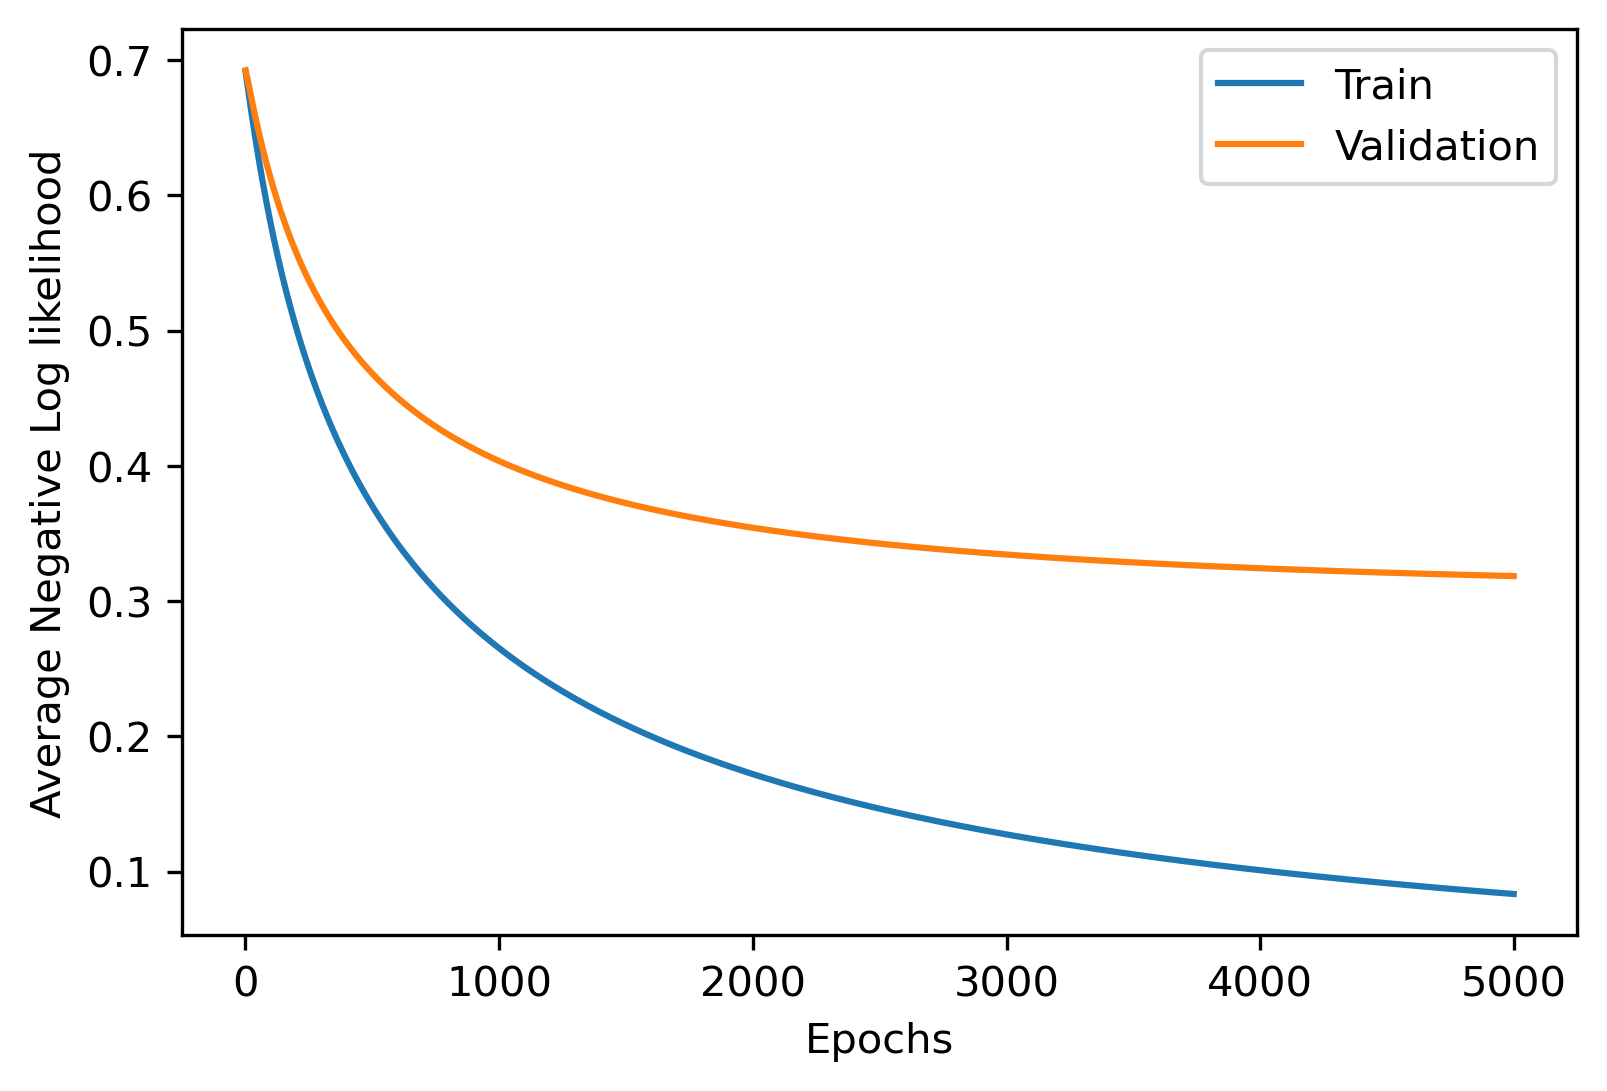

In [21]:
plt.figure(dpi=300)
plt.plot(Js_train)
plt.plot(Js_val)
plt.ylabel("Average Negative Log likelihood")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"])
plt.show()

In [42]:
alpha = 0.001
theta1_0001, train_pred_labels1_0001, Js_train1_0001, Js_val1_0001 = train_plot(alpha)

100%|██████████| 5000/5000 [13:09<00:00,  6.33it/s]


In [44]:
alpha = 0.1
theta1_01, train_pred_labels1_01, Js_train1_01, Js_val1_01 = train_plot(alpha)

100%|██████████| 5000/5000 [13:18<00:00,  6.26it/s]


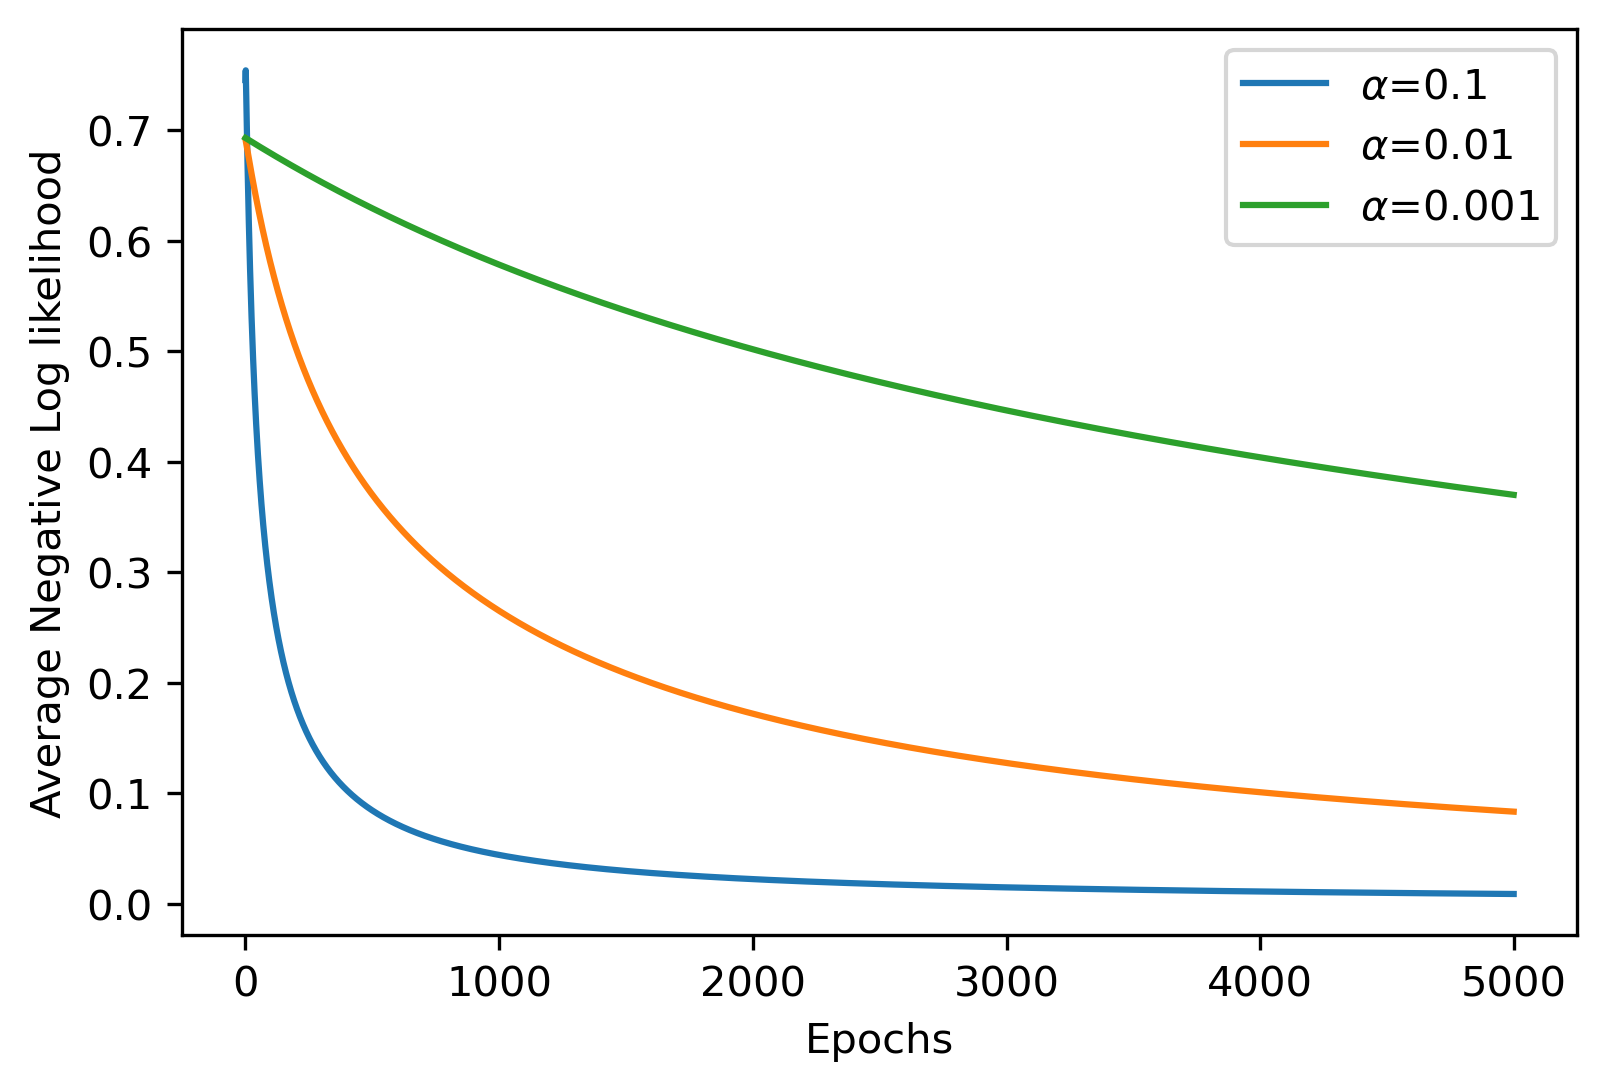

In [47]:
plt.figure(dpi=300)
plt.plot(Js_train1_01)
plt.plot(Js_train)
plt.plot(Js_train1_0001)
plt.ylabel("Average Negative Log likelihood")
plt.xlabel("Epochs")
plt.legend([r"$\alpha$=0.1", r"$\alpha$=0.01", r"$\alpha$=0.001"])
plt.show()

In [36]:
train_in = "./handout/largedata/train_data.tsv"
val_in = "./handout/largedata/valid_data.tsv"
test_in = "./handout/largedata/test_data.tsv"
formatted_train_out = "formatted_train_out.tsv"
formatted_val_out = "formatted_val_out.tsv"
formatted_test_out = "formatted_test_out.tsv"
feature_dict_in = "./handout/word2vec.txt"
extract_features2(train_in, formatted_train_out, feature_dict_in)
extract_features2(val_in, formatted_val_out, feature_dict_in)
extract_features2(test_in, formatted_test_out, feature_dict_in)

(14164,) (14164, 300)
(1200,) (1200, 300)
(14164,) (14164, 300)
(200,) (200, 300)
(14164,) (14164, 300)
(400,) (400, 300)


In [37]:
alpha = 0.01
theta2, train_pred_labels2, Js_train2, Js_val2 = train_plot(alpha)

100%|██████████| 5000/5000 [01:05<00:00, 75.80it/s]


In [38]:
data_train = read(formatted_train_in)
true_train_labels = data_train[:, 0]
error_train = np.mean(true_train_labels != train_pred_labels2)
data_test = read(formatted_test_in)
true_test_labels = data_test[:, 0]
X = data_test[:, 1:]
test_pred_labels = predict(X, theta2)
error_test = np.mean(true_test_labels != test_pred_labels)
print("error(train): {:.6f}\nerror(test): {:.6f}".format(error_train, error_test))

error(train): 0.214167
error(test): 0.255000


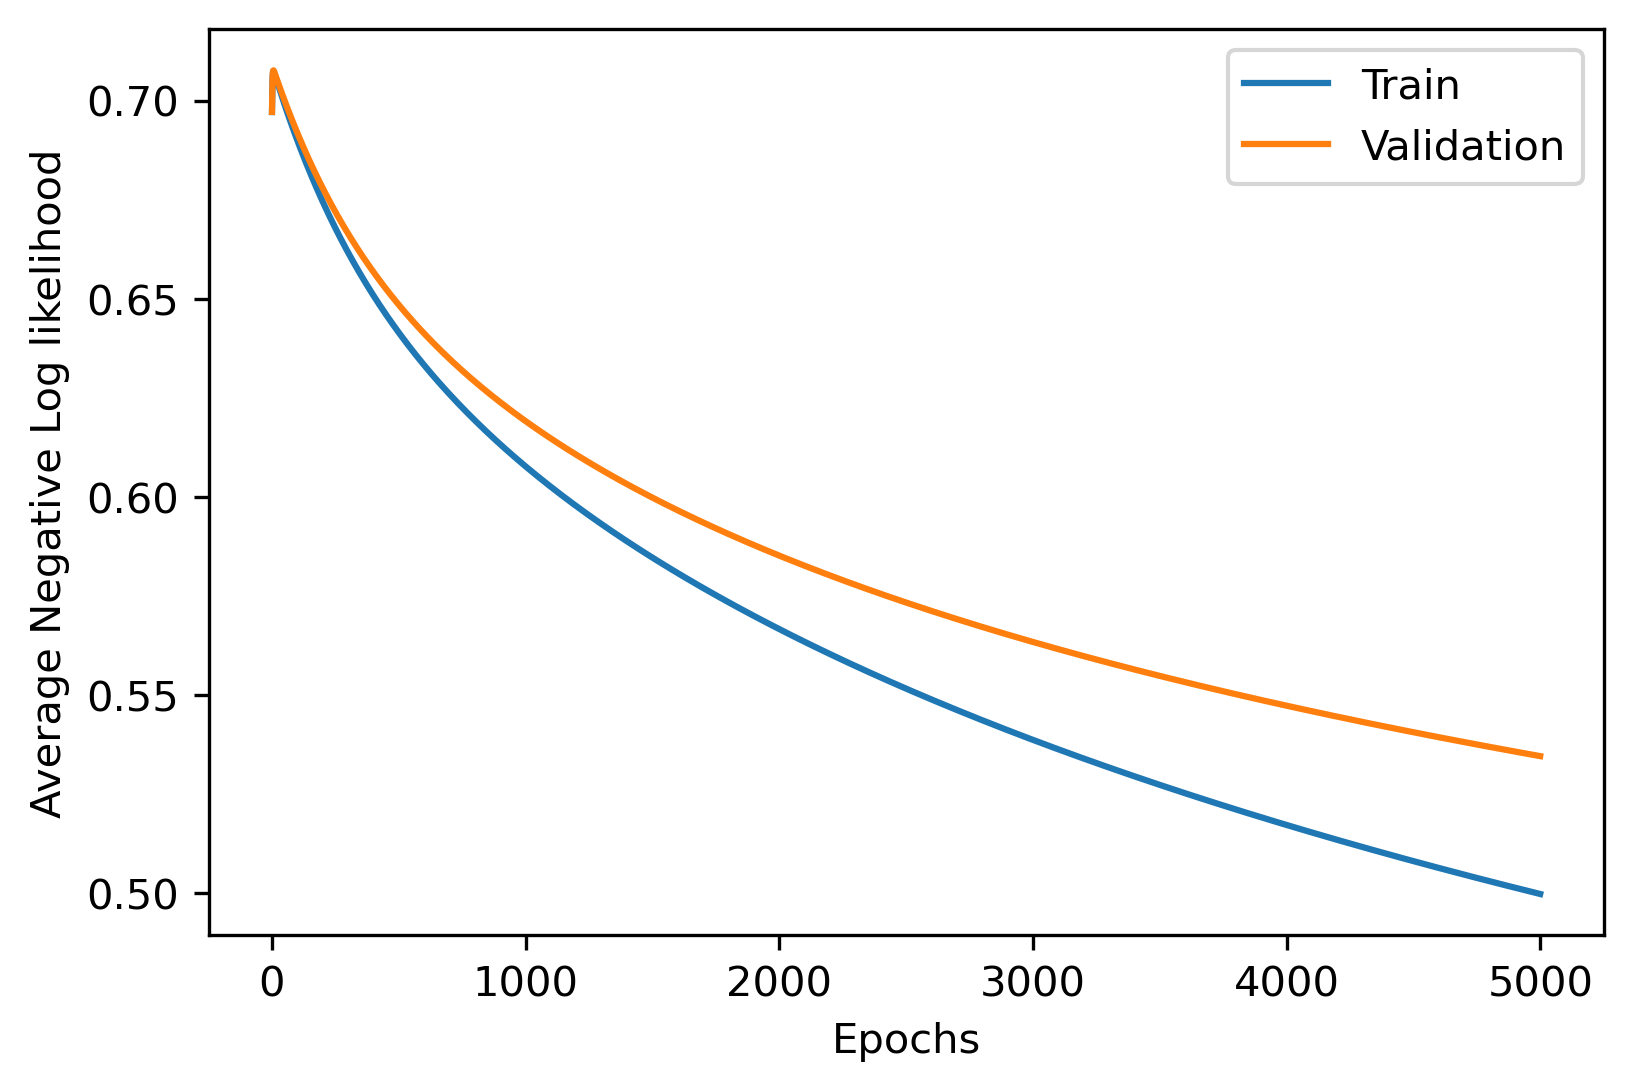

In [39]:
plt.figure(dpi=300)
plt.plot(Js_train2)
plt.plot(Js_val2)
plt.ylabel("Average Negative Log likelihood")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"])
plt.show()